In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import lightgbm as lgb
import warnings
from itertools import combinations
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## PREPROCESSING


In [2]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


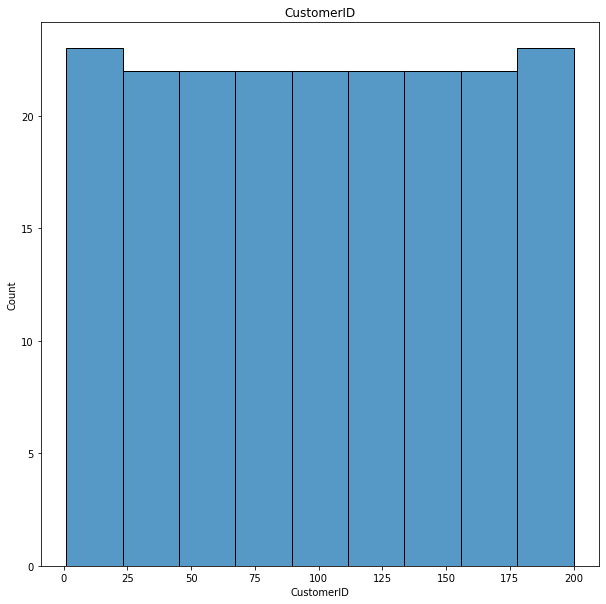

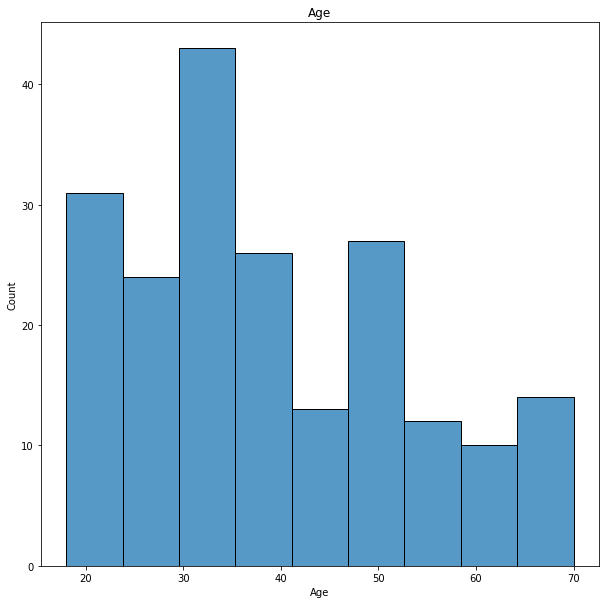

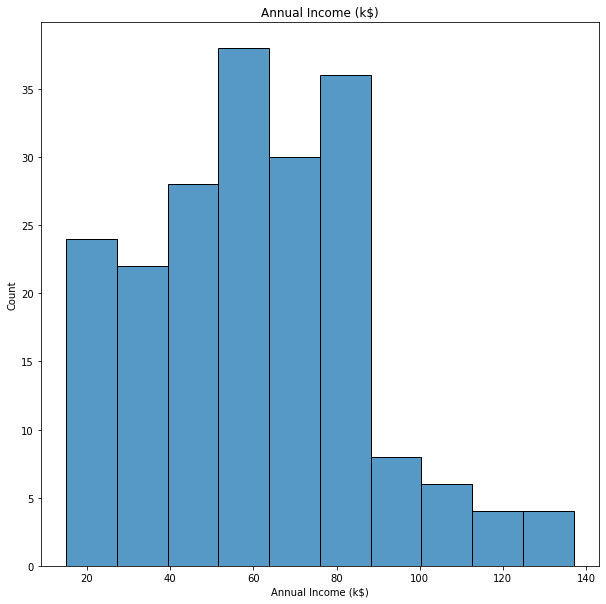

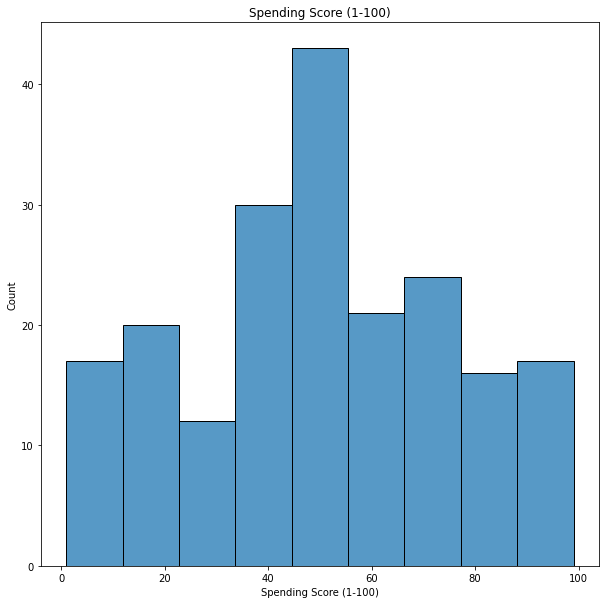

In [6]:
#Numerical values distribution graphs

# get the numerical columns of the DataFrame
num_cols = df.select_dtypes(include=['float64','int64']).columns

# create a figure with size (10, 10) for each numerical column
for col in num_cols:
    plt.figure(figsize=(10,10))
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.show()

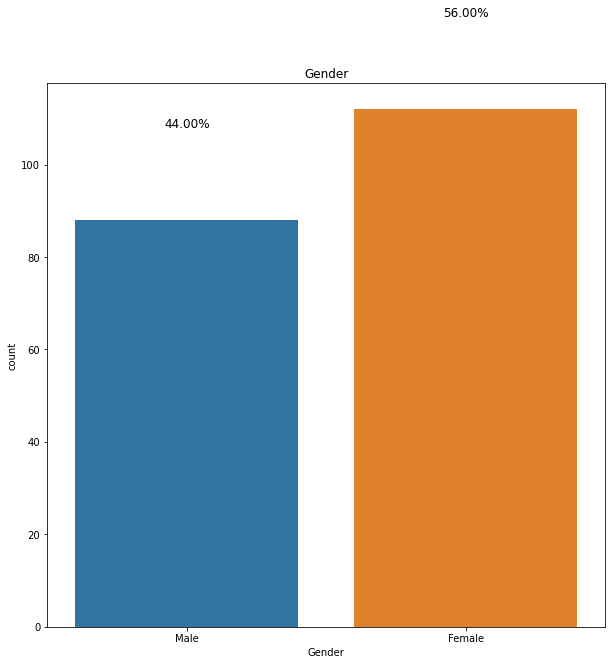

In [7]:
#Categorical values graphs
# get the categorical columns of the DataFrame
cat_cols = df.select_dtypes(include=['object','category']).columns

# create a countplot for each categorical column
for col in cat_cols:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(data=df, x=col)
    plt.title(col)
    
    # add percentage labels on each bar
    for p in ax.containers[0].patches:
        percent = (p.get_height()/len(df))*100
        ax.text(p.get_x()+p.get_width()/2,
                p.get_height()+20,
                '{:1.2f}%'.format(percent),
                ha='center', fontsize=12)
    plt.show()

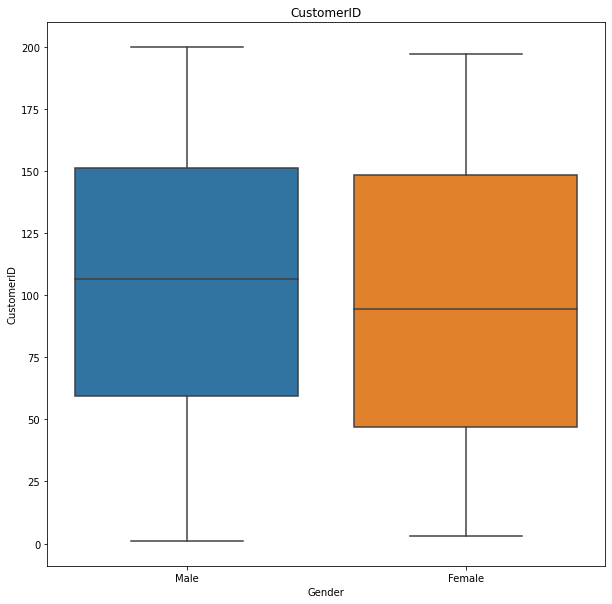

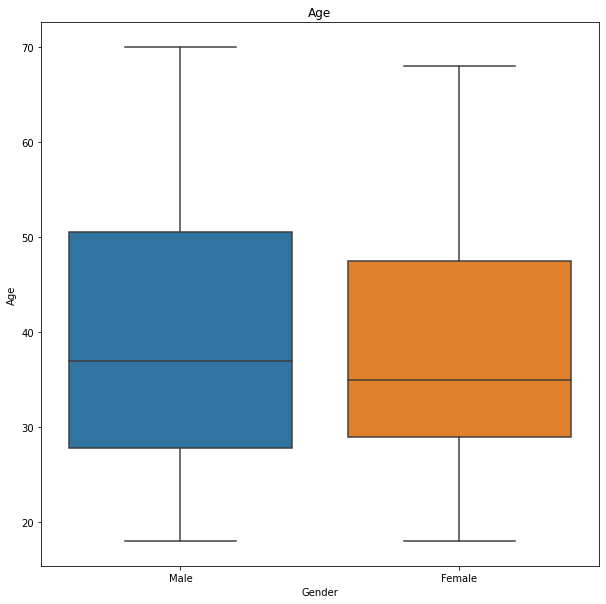

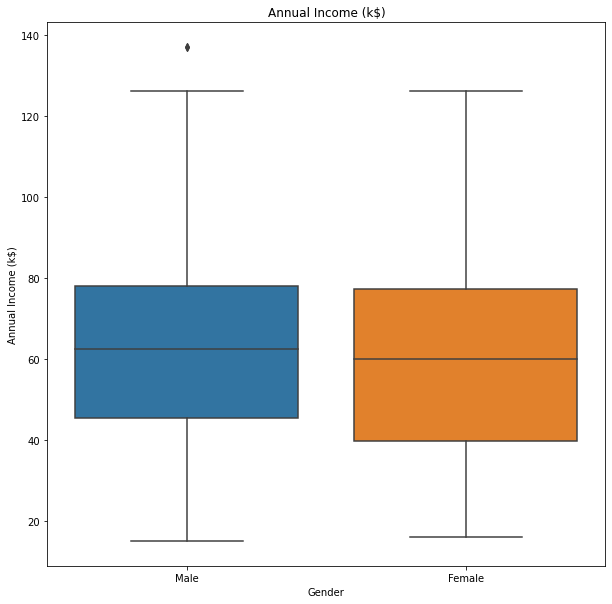

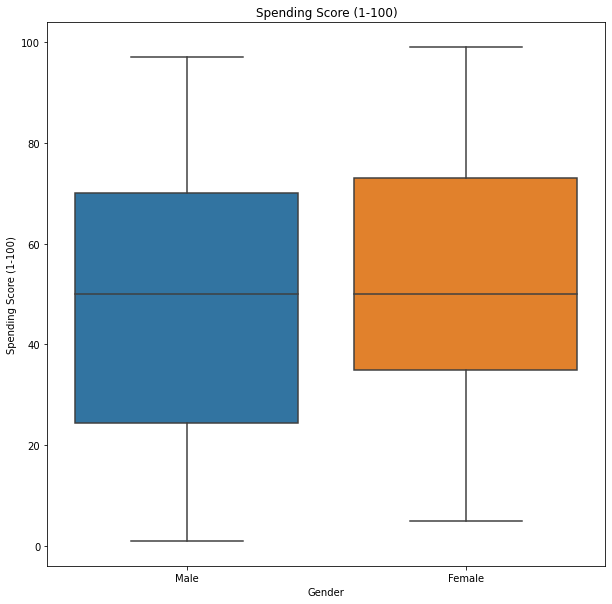

In [8]:
# create a countplot for each categorical column
for col in  df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(data=df, y=col, x="Gender")
    plt.title(col)
   
    plt.show()

## EXPLORATORY DATA ANALYSIS


In [9]:
df_train=df.drop('CustomerID',axis=1)

In [10]:
df_train.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


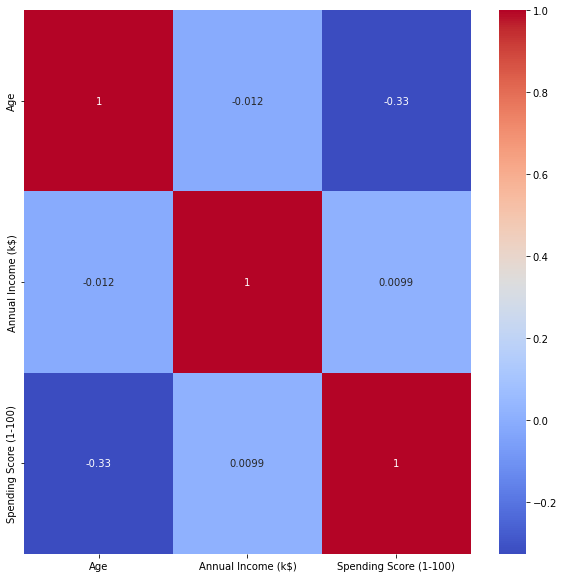

In [11]:
plt.figure(figsize=(10,10))

sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

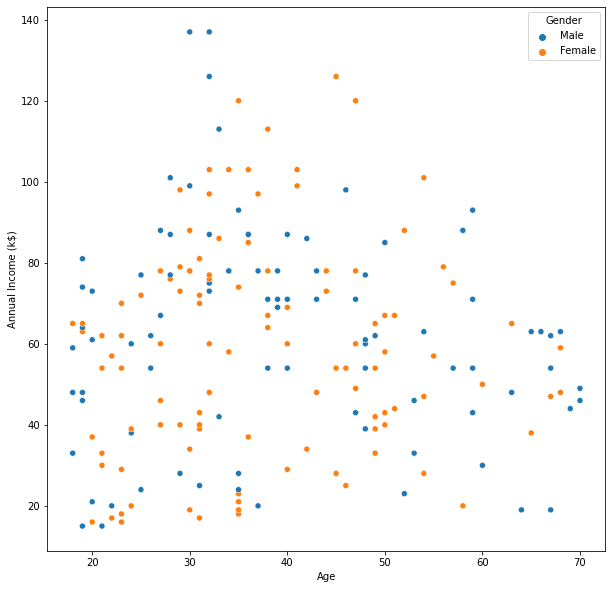

In [12]:
# create a scatterplot for each numeric column
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_train, x="Age",y="Annual Income (k$)", hue="Gender")
plt.show()

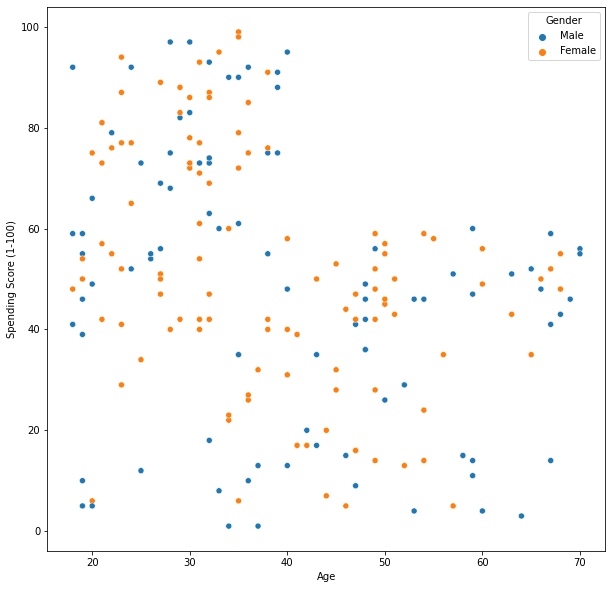

In [13]:
# create a scatterplot for each numeric column
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_train, x="Age",y="Spending Score (1-100)", hue="Gender")
plt.show()

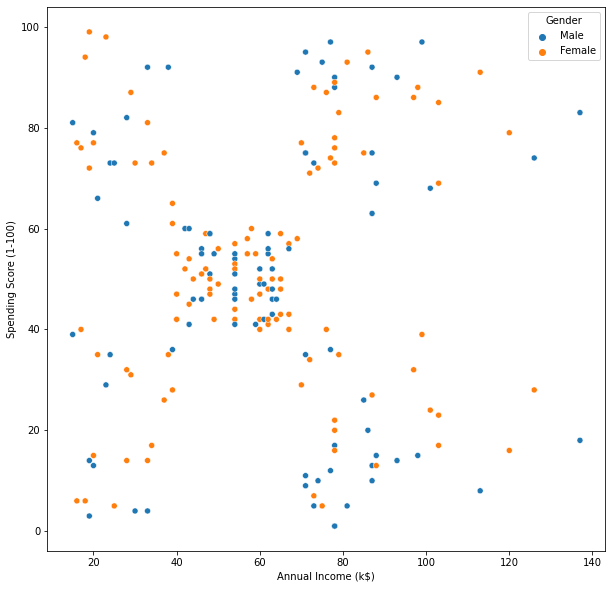

In [14]:
# create a scatterplot for each numeric column
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_train, x="Annual Income (k$)",y="Spending Score (1-100)", hue="Gender")
plt.show()

## MODEL BUILDING


## KMeans Model

In [15]:
df_km=df_train.copy(deep=True)


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_km.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_km[col] = le.fit_transform(df_km[col])

In [18]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [19]:
from sklearn.cluster import KMeans


# select the features
X = df_km

In [20]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


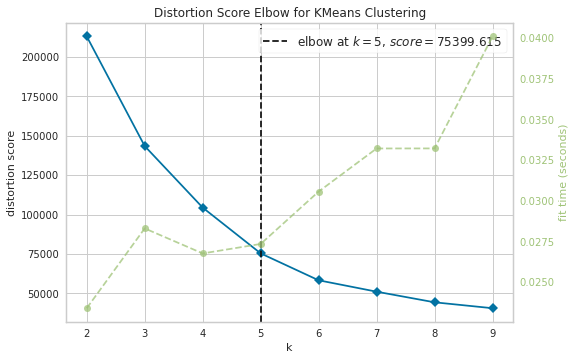

In [21]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

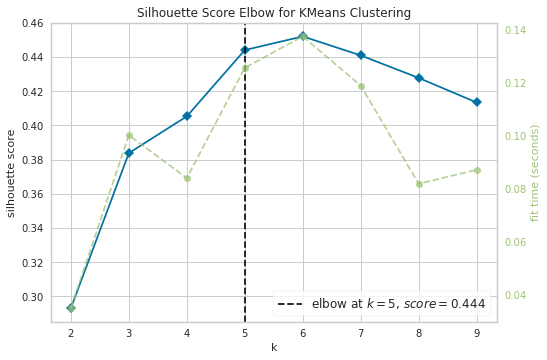

In [22]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

optimal k = 5 could be good choice.

In [23]:
# create a k-means object with the optimal number of clusters
optimal_k = 5 # number of clusters where the elbow is
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# fit the k-means object to the data
kmeans.fit(X)

# predict the cluster for each data point
y_kmeans = kmeans.predict(X)

# add the cluster predictions to the dataframe
df_km['cluster'] = y_kmeans

# display the first 5 rows of the dataframe with the cluster predictions
print(df_km.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0       1   19                  15                      39        0
1       1   21                  15                      81        4
2       0   20                  16                       6        0
3       0   23                  16                      77        4
4       0   31                  17                      40        0


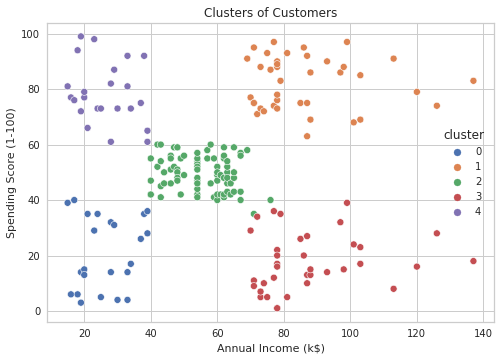

In [24]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_km, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# show the plot
plt.show()

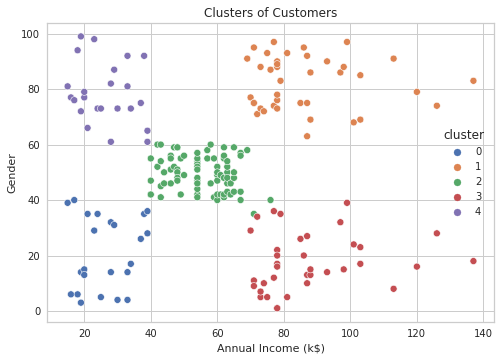

In [25]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_km, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender')

# show the plot
plt.show()

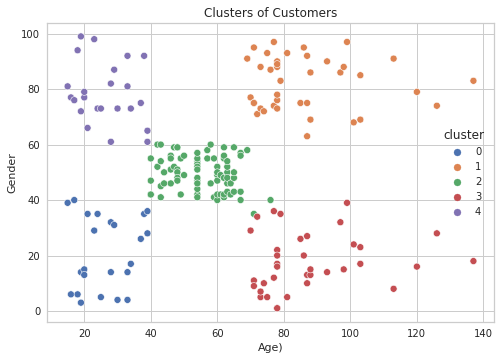

In [26]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_km, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Age)')
plt.ylabel('Gender')

# show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


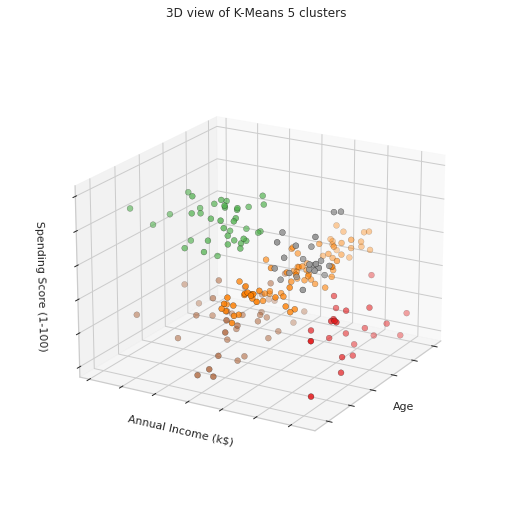

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(df_km['Age'],
           df_km['Annual Income (k$)'],
           df_km['Spending Score (1-100)'],
           c=df_km['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


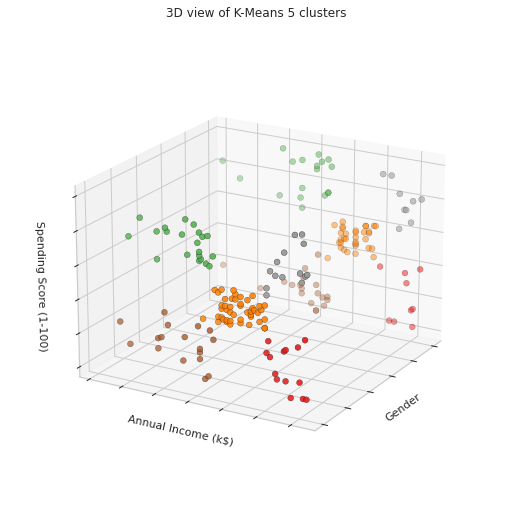

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(df_km['Gender'],
           df_km['Annual Income (k$)'],
           df_km['Spending Score (1-100)'],
           c=df_km['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

In [29]:
df_km.groupby('cluster').describe()

Gender                                                Age             \
         count      mean       std  min  25%  50%  75%  max count       mean   
cluster                                                                        
0         23.0  0.391304  0.499011  0.0  0.0  0.0  1.0  1.0  23.0  45.217391   
1         39.0  0.461538  0.505035  0.0  0.0  0.0  1.0  1.0  39.0  32.692308   
2         79.0  0.417722  0.496335  0.0  0.0  0.0  1.0  1.0  79.0  43.088608   
3         36.0  0.527778  0.506309  0.0  0.0  1.0  1.0  1.0  36.0  40.666667   
4         23.0  0.391304  0.499011  0.0  0.0  0.0  1.0  1.0  23.0  25.521739   

                                                  Annual Income (k$)  \
               std   min   25%   50%    75%   max              count   
cluster                                                                
0        13.228607  19.0  35.5  46.0  53.50  67.0               23.0   
1         3.728650  27.0  30.0  32.0  35.50  40.0               39.0   
2        16.478572  18.0  27.0  47.0  54.50  70.0               79.0   
3        11.496583  19.0  34.0  41.5  47.25  59.0               36.0   
4         5.273170  18.0  21.5  24.0  30.00  35.0               23.0   

                                                               \
              mean        std   min   25%   50%    75%    max   
cluster                                                         
0        26.304348   7.893811  15.0  19.5  25.0  33.00   39.0   
1        86.538462  16.312485  69.0  75.5  79.0  95.00  137.0   
2        55.291139   8.710665  40.0  48.0  54.0  62.00   76.0   
3        87.750000  16.387059  70.0  77.0  83.0  97.25  137.0   
4        26.304348   7.893811  15.0  19.5  25.0  33.00   39.0   

        Spending Score (1-100)                                                \
                         count       mean        std   min   25%   50%   75%   
cluster                                                                        
0                         23.0  20.913043  13.017167   3.0   9.5  17.0  33.5   
1                         39.0  82.128205   9.364489  63.0  74.5  83.0  90.0   
2                         79.0  49.569620   6.242295  35.0  44.5  50.0  55.0   
3                         36.0  17.583333  10.204691   1.0  10.0  16.0  24.5   
4                         23.0  78.565217  10.953729  61.0  73.0  77.0  84.5   

               
          max  
cluster        
0        40.0  
1        97.0  
2        60.0  
3        39.0  
4        99.0

## Hierarchical Clustering ( Agglomerative)

In [30]:
df_ag=df_train.copy(deep=True)


In [31]:
df_ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_ag.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_ag[col] = le.fit_transform(df_ag[col])

In [33]:
df_ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [35]:
cluster_labels = model.fit_predict(df_ag)
cluster_labels

array([195, 132, 103, 197, 189, 166, 117, 135, 153, 129, 199, 172, 177,
       188, 139, 159, 184, 147, 157, 181, 171, 140, 143, 104, 127, 111,
       156, 123, 108, 119, 116, 109, 121, 113, 175, 124, 173, 163, 191,
       165, 100, 112, 110, 174, 120, 183, 144, 131, 196, 155, 182, 176,
       142, 133,  82, 138, 178, 136, 125, 141,  91, 154, 170, 134, 169,
        99, 128, 185, 114, 107,  65, 187, 101,  61, 164,  88,  93, 126,
        56,  85, 115,  57, 137, 190,  87, 198,  81, 186, 179, 160,  77,
        69, 192, 130, 193,  43, 102, 167,  62,  79, 194,  94,  64,  76,
       149, 150,  97,  70, 148, 106, 180, 122,  89,  86,  96, 151,  54,
        92, 145, 118,  63,  74,  31, 162, 146,  59,  55, 161,  58,  98,
       168,  27,  28,  46, 152,  72,  34,  50,  73,  40,  75,  71,  80,
        83,  49,  66,  53,  95,  84,  13,  90,  44,  35,  60, 158,  36,
        45,  37,  29,  67,  39,  51,  47,  42,  30,  21,  48,  19,  22,
        41,  78,  68,  33,  16, 105,  26,  17,  32,  20,  15,  5

In [36]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5]

array([[ 76.        , 113.        ,   1.41421356,   2.        ],
       [ 43.        ,  88.        ,   1.41421356,   2.        ],
       [  9.        ,  47.        ,   1.41421356,   2.        ],
       [ 49.        ,  91.        ,   1.41421356,   2.        ],
       [ 24.        ,  93.        ,   1.41421356,   2.        ]])

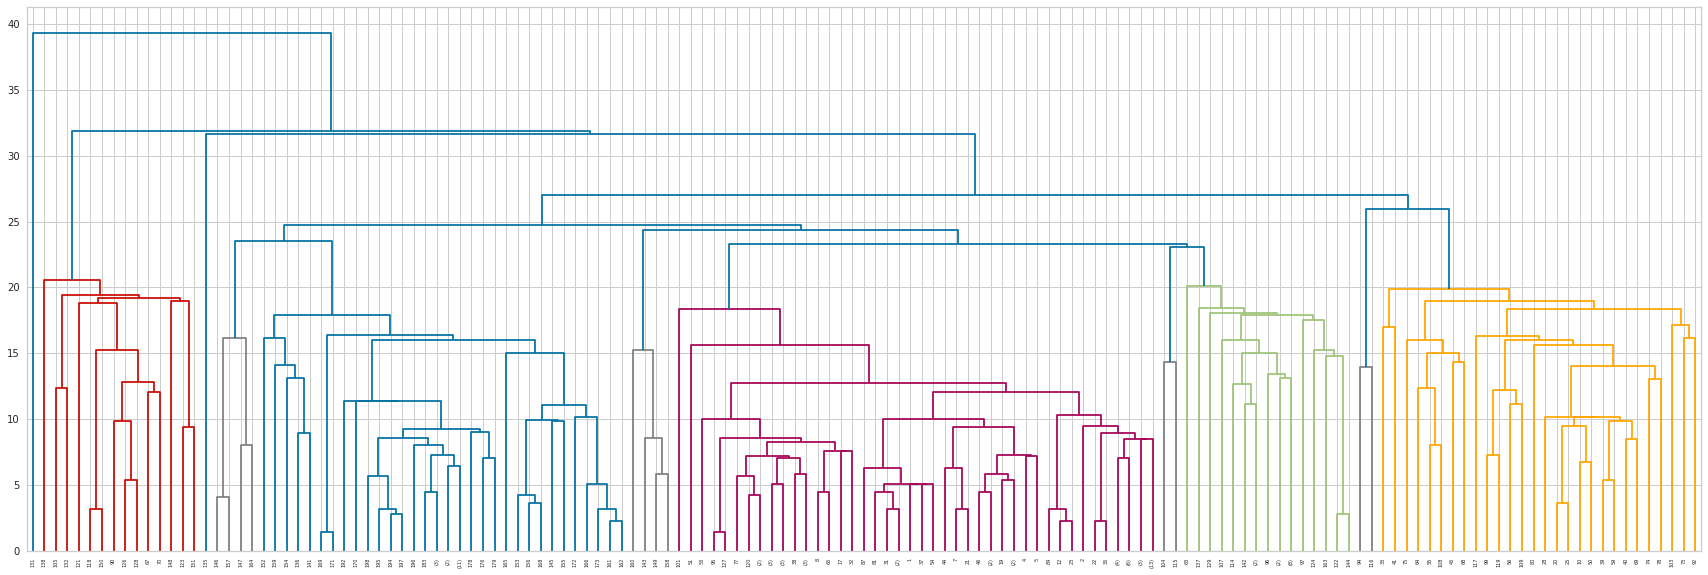

In [37]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=23) # color_threshold=23 sets clusters below y-axis value of 23 to be of the same color

In [38]:
model = AgglomerativeClustering(n_clusters=5)


In [39]:
df_ag['cluster']=model.fit_predict(df_ag) # predict the categories for each point.


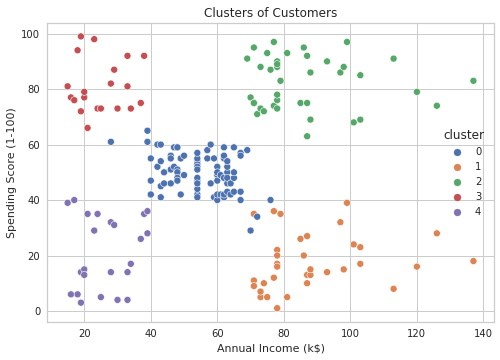

In [40]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_ag, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# show the plot
plt.show()

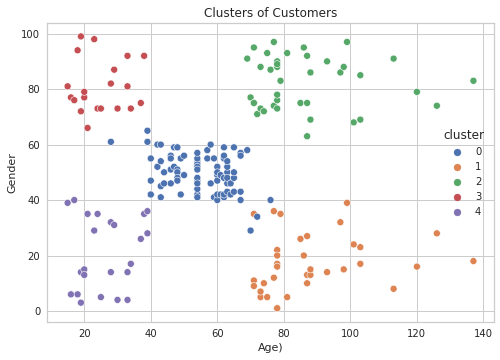

In [41]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_ag, palette="deep")

# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Age)')
plt.ylabel('Gender')

# show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


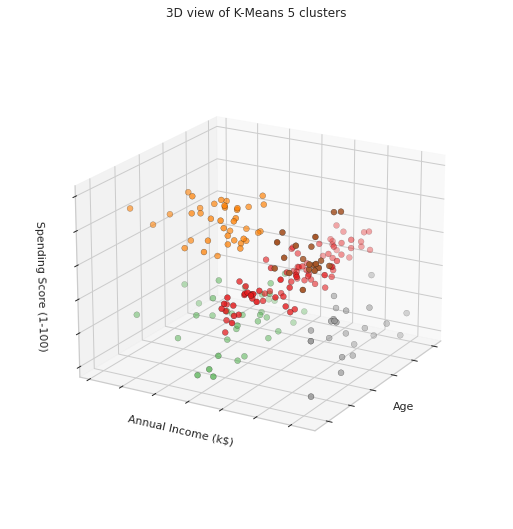

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(df_ag['Age'],
           df_ag['Annual Income (k$)'],
           df_ag['Spending Score (1-100)'],
           c=df_ag['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


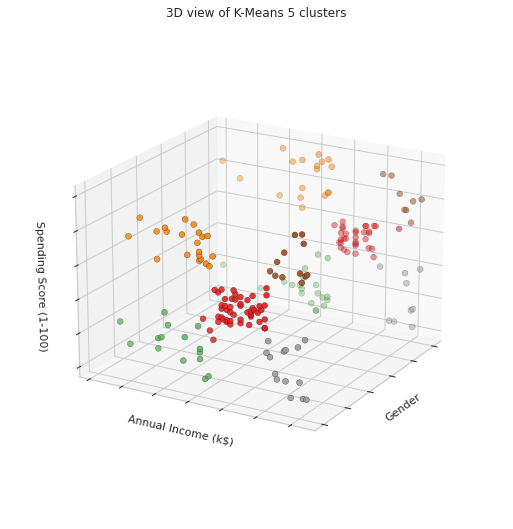

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(df_ag['Gender'],
           df_ag['Annual Income (k$)'],
           df_ag['Spending Score (1-100)'],
           c=df_ag['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

## DBSCAN

In [44]:
df_db=df_train.copy(deep=True)

In [45]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [47]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_db.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_db[col] = le.fit_transform(df_db[col])

In [50]:
from sklearn.cluster import DBSCAN
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))


In [51]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_db)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(df_db, DBS_clustering.labels_))

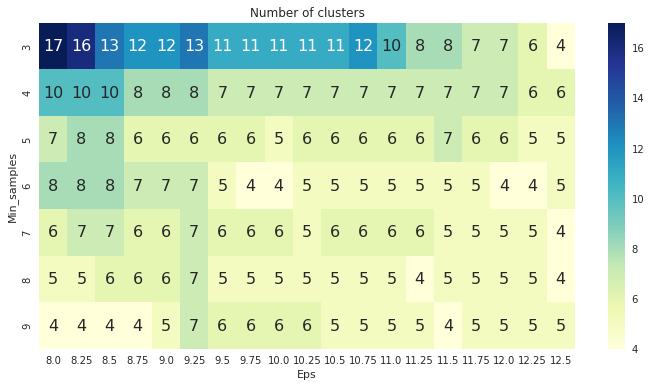

In [52]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

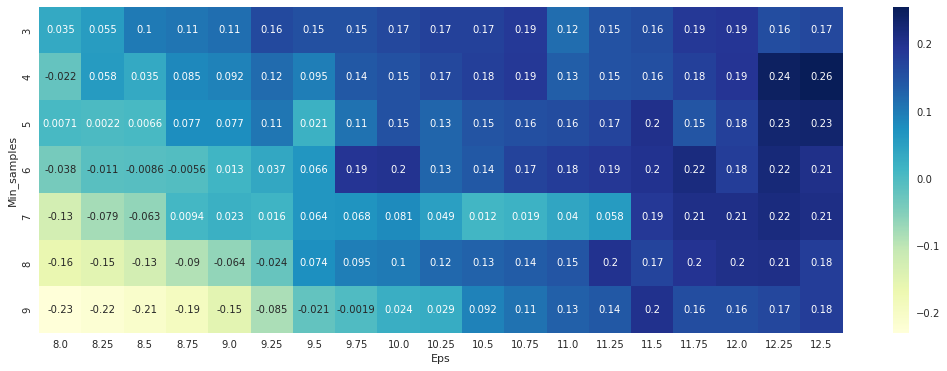

In [53]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [55]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(df_db)

DBSCAN_clustered = df_db.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [56]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


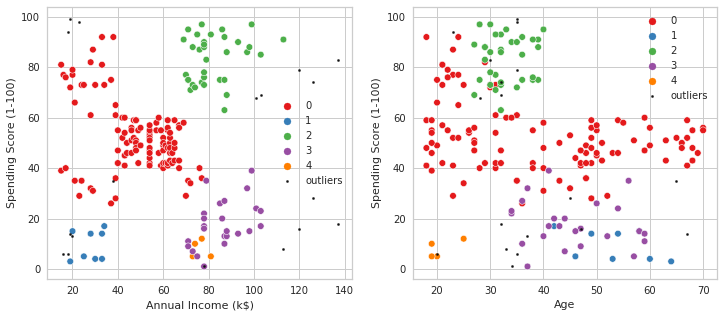

In [57]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

## AP Model

In [58]:
df_ap=df_train.copy(deep=True)

In [59]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [60]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Get a list of categorical columns
categorical_cols = df_ap.select_dtypes(include='object').columns

# Apply the label encoder to each categorical column
for col in categorical_cols:
    df_ap[col] = le.fit_transform(df_ap[col])

In [63]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [66]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(df_ap)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(df_ap, AF.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,preference,clusters,sil_score
82,-11800.0,6.0,0.451356
27,-17300.0,6.0,0.451202
55,-14500.0,6.0,0.451202
53,-14700.0,6.0,0.451202
52,-14800.0,6.0,0.451202


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


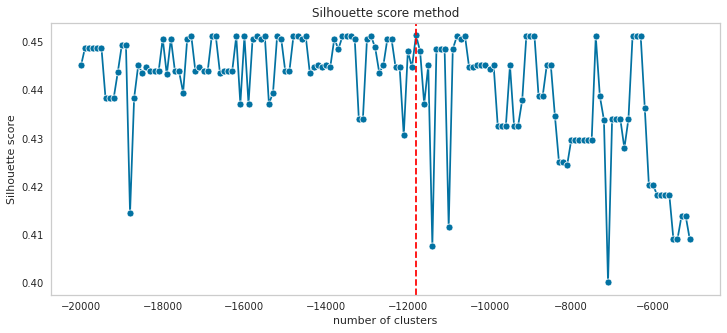

In [67]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(preferences, af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [68]:
AF = AffinityPropagation(preference=-11800).fit(df_ap)


In [69]:
AF_clustered = df_ap.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [70]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


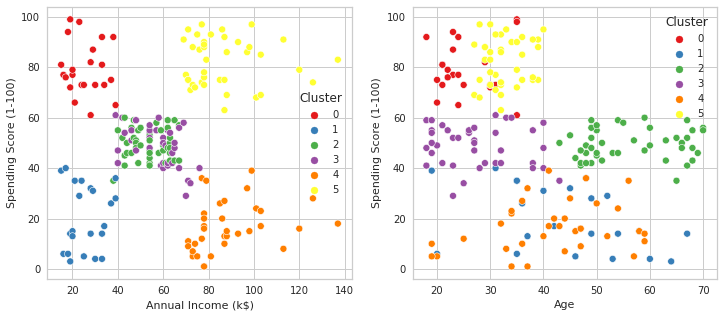

In [71]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()